In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df=pd.read_csv("/content/drive/MyDrive/Testingtool.csv")
df.head(5)






,Testing Tool,Frequency
0,Katalon Studio,3
1,J Meter,4
2,TestNG,40
3,Appium,5
4,Selenium,4


In [3]:
df.index = df['Testing Tool']
df = df.sort_values(by='Frequency',ascending=False)
print(df)

                  Testing Tool  Frequency
Testing Tool                             
TestNG                  TestNG         40
POSTMAN                POSTMAN         40
Appium                  Appium          5
J Meter                J Meter          4
Selenium              Selenium          4
Katalon Studio  Katalon Studio          3
Perfecto              Perfecto          2
LambdaTEST          LambdaTEST          2


In [4]:
df["cumulativePercentage"] = df["Frequency"].cumsum()/df["Frequency"].sum()*100
df["cumulativePercentage"] = df["cumulativePercentage"].apply(lambda x:round(x,2))
print(df)

                  Testing Tool  Frequency  cumulativePercentage
Testing Tool                                                   
TestNG                  TestNG         40                  40.0
POSTMAN                POSTMAN         40                  80.0
Appium                  Appium          5                  85.0
J Meter                J Meter          4                  89.0
Selenium              Selenium          4                  93.0
Katalon Studio  Katalon Studio          3                  96.0
Perfecto              Perfecto          2                  98.0
LambdaTEST          LambdaTEST          2                 100.0


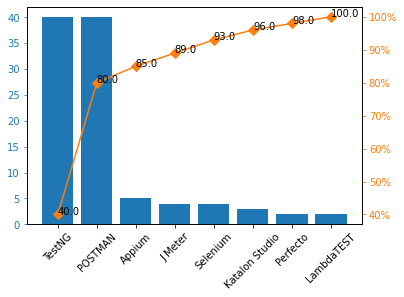

In [6]:
fig, ax = plt.subplots()
ax.bar(df.index, df["Frequency"], color="C0")
ax.set_xticklabels(df['Testing Tool'], rotation=45)
ax2=ax.twinx()
ax2.plot(df.index, df["cumulativePercentage"], color="C1", marker="D", ms=7, label=df['cumulativePercentage'])
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

for index, v in df.iterrows():
  label = round(v['cumulativePercentage'],1)
  plt.annotate(label, xy =(v['Testing Tool'],v['cumulativePercentage']))
  
plt.show()